In [2]:
import pandas as pd
import numpy as np
import json
import shapely.geometry
import uuid

In [12]:
with open('../data/Official_Neighborhoods.geojson') as file:
  data = json.load(file)
features = data['features']
neighborhoods = pd.DataFrame()
for feature in features:
  geo_type = feature['geometry']['type']
  if geo_type == 'Polygon':
    geometry = shapely.geometry.Polygon(feature['geometry']['coordinates'][0])
  elif geo_type == 'MultiPolygon':
    geometry = shapely.geometry.MultiPolygon(feature['geometry']['coordinates'])
  else:
    geometry = np.nan
  neighborhood = pd.DataFrame({
    'id': feature['properties']['OBJECTID'],
    'name': feature['properties']['NAME'],
    'geo_type': feature['geometry']['type'],
    'geometry': geometry
  }, index=[0])
  neighborhoods = pd.concat([neighborhoods, neighborhood], ignore_index=True)
  
with open('../data/zillow_all_active_atlanta.csv') as file:
  active_df = pd.read_csv(file, header=0)

with open('../data/zillow_sold_atlanta.csv') as file:
  sold_df = pd.read_csv(file, header=0)
  
df = pd.concat([active_df, sold_df], ignore_index=True)
df.reset_index(drop=True, inplace=True)

def find_neighborhood_id(lng, lat):
  point = shapely.geometry.Point(lng, lat)
  in_neighborhood = neighborhoods.apply(lambda row: row['geometry'].contains(point), axis=1)
  indices = in_neighborhood[in_neighborhood].index
  if len(indices) == 0:
    return -1
  return neighborhoods.loc[indices[0], 'id']

df['neighborhood_id'] = df.apply(lambda row: find_neighborhood_id(row['longitude'], row['latitude']), axis=1)

df.to_csv('../data/zillow_atlanta_with_neighborhood.csv', index=False)

/var/folders/6v/n3x50m4s03380xg5w06p_2nw0000gn/T/ipykernel_49858/4179861462.py:25: DtypeWarning: Columns (37,66,76,81,121) have mixed types. Specify dtype option on import or set low_memory=False.
  sold_df = pd.read_csv(file, header=0)


KeyboardInterrupt: 

In [11]:
city_map = {
  'avondale est': 'avondale estates',
  'east pt': 'east point',
  'lithia spgs': 'lithia springs',
}
casted_cities_df = df.copy()
casted_cities_df['address_city'] = df['address_city'].apply(lambda s: s.lower()).replace(city_map)
cities = casted_cities_df['address_city'].unique().tolist()
city_city_id_map = {city: uuid.uuid4() for city in cities}
casted_cities_df['city_id'] = casted_cities_df['address_city'].apply(lambda city: city_city_id_map[city])
print(cities)
casted_cities_df

NameError: name 'df' is not defined

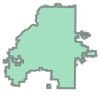

In [26]:
with open('../data/atlanta_boundary.geojson') as file:
  atl_boundary = json.load(file)
geometry = shapely.geometry.MultiPolygon(atl_boundary['features'][0]['geometry']['coordinates'])
geometry

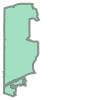

In [43]:
with open('../data/brookhaven_boundary.geojson') as file:
  brookhaven_boundary = json.load(file)
geometry = shapely.geometry.Polygon(brookhaven_boundary['features'][0]['geometry']['coordinates'][0])
geometry

In [44]:
def to_shapely(geojson_file_path):
  with open(geojson_file_path) as file:
    geojson = json.load(file)
  geo_type = geojson['features'][0]['geometry']['type']
  if geo_type == 'Polygon':
    geometry = shapely.geometry.Polygon(geojson['features'][0]['geometry']['coordinates'][0])
  elif geo_type == 'MultiPolygon':
    geometry = shapely.geometry.MultiPolygon(geojson['features'][0]['geometry']['coordinates'])
  else:
    geometry = np.nan
  return geometry

In [48]:
geojson_files = [
  '../data/atlanta_boundary.geojson',
  '../data/brookhaven_boundary.geojson'
]
boundary_geos = [to_shapely(file) for file in geojson_files]
pd.DataFrame({ 'file': geojson_files, 'geometry': boundary_geos })

file  \
0     ../data/atlanta_boundary.geojson   
1  ../data/brookhaven_boundary.geojson   

                                            geometry  
0  MULTIPOLYGON (((-84.42135502845584 33.65888234...  
1  POLYGON ((-84.31823800696078 33.9198765085623,...

In [26]:
cities_in_data = ['atlanta',
 'avondale est',
 'avondale estates',
 'brookhaven',
 'chamblee',
 'chester',
 'clarkston',
 'college park',
 'decatur',
 'doraville',
 'douglasville',
 'dunwoody',
 'east point',
 'east pt',
 'fairburn',
 'forest park',
 'hapeville',
 'hebron', #
 'lithia spgs',
 'lithia springs', #
 'locust grove',
 'mableton',
 'marietta',
 'pine lake',
 'riverdale',
 'sandy springs',
 'scottdale', #
 'smyrna',
 'soldotna', #
 'south fulton',
 'stone mountain',
 'trappe', #
 'tucker',
 'union city',
 'vinings'#
]

with open('../data/georgia_city_boundaries.geojson') as file:
  georgia_city_geojson = json.load(file)
my_cities = []
for feature in georgia_city_geojson['features']:
  name = feature['properties']['Name'].lower()
  if name in cities_in_data:
    my_cities.append(feature)
my_cities

city_geometries_df = pd.DataFrame()
for city in my_cities:
  geo_type = city['geometry']['type']
  try:
    if geo_type == 'Polygon':
      geometry = shapely.geometry.Polygon(city['geometry']['coordinates'][0])
    elif geo_type == 'MultiPolygon':
      geometry = shapely.geometry.MultiPolygon(city['geometry']['coordinates'])
    else:
      geometry = np.nan
  except:
    print(city['properties']['Name'])
    print(city)
    geometry = np.nan
  city_df = pd.DataFrame({
    'name': city['properties']['Name'].lower(),
    'geometry': geometry
  }, index=[0])
  city_geometries_df = pd.concat([city_geometries_df, city_df], ignore_index=True)
city_geometries_df

Douglasville
{'type': 'Feature', 'id': 933, 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[-84.5971887212242, 33.740702421227056], [-84.59698822907134, 33.74022291135226], [-84.59692761509623, 33.74007722210923], [-84.59692596486055, 33.74007267001947], [-84.59688094462635, 33.739922983494395], [-84.59688019808816, 33.73992023335832], [-84.59687963575715, 33.739917630451], [-84.59685095513558, 33.73976701147601], [-84.59675560177516, 33.7393678360688], [-84.59666547107537, 33.73896658029696], [-84.5966648326935, 33.73896322477521], [-84.59662306442593, 33.73868768619907], [-84.59659063955799, 33.73841068053805], [-84.5965677203963, 33.738133608399075], [-84.59648486801507, 33.73699072148218], [-84.59647359596842, 33.73674623493619], [-84.59637754329349, 33.73616374328797], [-84.5963738276724, 33.73587195415934], [-84.59636822280835, 33.735431740067185], [-84.59636662202112, 33.735348543122775], [-84.59651834365388, 33.735346667990854], [-84.59771022983253, 33.73436990983881], 

name                                           geometry
0            chester  POLYGON ((-83.14555577571737 32.3924321825889,...
1          riverdale  MULTIPOLYGON (((-84.4006361824267 33.582851382...
2       douglasville                                                NaN
3        forest park                                                NaN
4           marietta                                                NaN
5          pine lake  POLYGON ((-84.20196241026247 33.79525896823018...
6     stone mountain  MULTIPOLYGON (((-84.16467976251288 33.81301461...
7           dunwoody  POLYGON ((-84.33929858963353 33.91678475746381...
8           chamblee  POLYGON ((-84.29881136451226 33.91967320731363...
9       locust grove  POLYGON ((-84.05377020656965 33.31941905874771...
10        brookhaven  POLYGON ((-84.32848351837652 33.82815238867652...
11         doraville  POLYGON ((-84.2610629935739 33.922043101320206...
12           decatur  POLYGON ((-84.29580880559267 33.79349391973376...
13         clarkston  MULTIPOLYGON (((-84.25023716545698 33.80272145...
14            smyrna  POLYGON ((-84.53225822699716 33.84199422155558...
15            tucker  POLYGON ((-84.24675974884698 33.85588028269848...
16  avondale estates  POLYGON ((-84.26616876024461 33.78129691562929...
17           atlanta  MULTIPOLYGON (((-84.3872294200556 33.880919398...
18      college park  POLYGON ((-84.43747312988961 33.66761615314699...
19        union city  MULTIPOLYGON (((-84.57270424081132 33.63356592...
20         hapeville  POLYGON ((-84.41809440985772 33.67317125119634...
21     sandy springs  POLYGON ((-84.33442513391472 34.01008408308745...
22      south fulton                                                NaN
23          fairburn  POLYGON ((-84.56639458615004 33.526059417671, ...
24        east point  POLYGON ((-84.41809440985772 33.67317125119634...
25          mableton  MULTIPOLYGON (((-84.62326516193791 33.86941244...

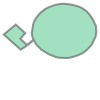

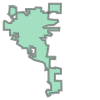

nan

nan

nan

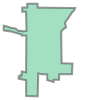

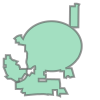

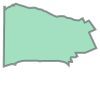

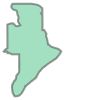

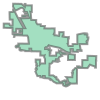

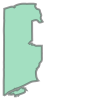

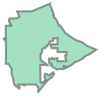

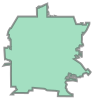

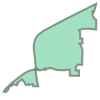

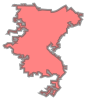

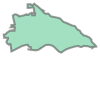

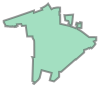

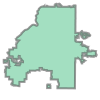

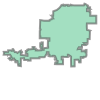

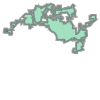

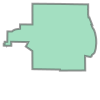

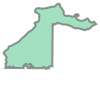

nan

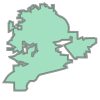

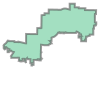

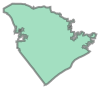

In [27]:
for geometry in city_geometries_df['geometry']:
  display(geometry)

In [28]:
city_geometries_df.to_pickle('../data/city_geometries_df.pkl')

In [29]:
zillow_df = pd.read_csv('../data/zillow_atlanta_with_neighborhood.csv', header=0)

/var/folders/6v/n3x50m4s03380xg5w06p_2nw0000gn/T/ipykernel_49858/3865116638.py:1: DtypeWarning: Columns (37,66,68,76,78,81) have mixed types. Specify dtype option on import or set low_memory=False.
  zillow_df = pd.read_csv('../data/zillow_atlanta_with_neighborhood.csv', header=0)


In [41]:
# join city geometries and zillow data
city_geometries_df = pd.read_pickle('../data/city_geometries_df.pkl')
my_city_geometries = city_geometries_df.dropna()
zillow_df.address_city = zillow_df.address_city.str.lower().replace(city_map)
found_cities = []
for i, house in zillow_df.iterrows():
  point = shapely.geometry.Point(house.longitude, house.latitude)
  city_idx = my_city_geometries.apply(lambda row: row['geometry'].contains(point), axis=1)
  city = my_city_geometries.loc[city_idx, 'name']
  if len(city) == 0:
    city = np.nan
  else:
    city = city.iloc[0]
  found_cities.append(city)
zillow_df['found_city'] = found_cities
zillow_df.to_pickle('../data/zillow_atlanta_with_neighborhood_and_city.pkl')


In [50]:
# zillow when foundcity is not null
zillow_df.dropna(subset=['found_city'], inplace=True)
# zillow when foundcity is not address_city
zillow_df = zillow_df[zillow_df.found_city != zillow_df.address_city]
zillow_df

propertyId  address_houseNumber        address_street address_city  \
928     336821085               1382.0      1382 Live Oak Ln      atlanta   
929      87684431               1696.0       1696 Renfroe Pl      atlanta   
930    2074407052               1056.0  1056 Fairway Ests NE      atlanta   
931      14550824               1138.0     1138 Fairway Gdns      atlanta   
932      14558373               1396.0       1396 Sylvan Cir      atlanta   
...           ...                  ...                   ...          ...   
48451   249109931                  NaN      Old National Hwy    riverdale   
48492    54719058               5180.0        5180 Jones Cir      atlanta   
48559  2059111856               3419.0  3419 Catalina Dr #15      decatur   
48560    14559789               2627.0        2627 Boland Dr      atlanta   
48561  2058225843               5634.0        5634 Hislop Ln     mableton   

      address_county  address_countyFipsCode address_state  address_zip  \
928           Dekalb                 13089.0            GA        30319   
929           Dekalb                 13089.0            GA        30319   
930           Dekalb                 13089.0            GA        30319   
931           Dekalb                 13089.0            GA        30319   
932           Dekalb                 13089.0            GA        30319   
...              ...                     ...           ...          ...   
48451         Fulton                 13121.0            GA        30349   
48492        Clayton                 13063.0            GA        30349   
48559         Dekalb                     NaN            GA        30032   
48560         Dekalb                 13089.0            GA        30319   
48561         Dekalb                     NaN            GA        30126   

       address_zipPlus4                                         appliances  \
928                 NaN  Dishwasher; Disposal; Double Oven; Dryer; Gas ...   
929                 NaN  Dishwasher; Disposal; ENERGY STAR Qualified Ap...   
930                 NaN  Dishwasher; Disposal; Double Oven; Gas Cooktop...   
931                 NaN  Dishwasher; Disposal; Double Oven; Microwave; ...   
932                 NaN  Dishwasher; Disposal; Gas Range; Microwave; Ra...   
...                 ...                                                ...   
48451               NaN                                                NaN   
48492               NaN  Gas Water Heater; Oven/Range (Combo); Refriger...   
48559               NaN  Gas Water Heater; Dishwasher; Disposal; Microwave   
48560               NaN                                                NaN   
48561               NaN    Dishwasher; Disposal; Electric Range; Microwave   

       ... schools_middleSchoolDistrict  schools_highSchoolDistrict  \
928    ...                          NaN                         NaN   
929    ...                          NaN                         NaN   
930    ...                          NaN                         NaN   
931    ...                          NaN                         NaN   
932    ...                          NaN                         NaN   
...    ...                          ...                         ...   
48451  ...                          NaN                         NaN   
48492  ...                          NaN                         NaN   
48559  ...                          NaN                         NaN   
48560  ...                          NaN                         NaN   
48561  ...                          NaN                         NaN   

           parcelId  parcel_number transit_score  walk_score  bike_score  \
928      1820102233     1820102233           NaN        36.0        38.0   
929      1830611019  18 306 11 019          54.0        28.0        43.0   
930             NaN  18 200 14 052          36.0         7.0         6.0   
931      1820014004  18 200 14 004           NaN         0.0        12.0   
932      18